# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import beam_simulation as bs
print("Loaded from:", bs.__file__)

Loaded from: /Users/mpbart/Desktop/beam_project/beam_simulation/__init__.py


# Configure Set Up

In [ ]:
cfg = bs.Config(
    wavelength=795e-9,
    size_x=400,
    size_y=400,
    pixel_size=1080*8e-6/400, # adjusted to approximate size of SLM
    w0=0.35e-3, 
)

print("Default config now set to:")
print(bs.get_default_config())

Default config now set to:
Beam Simulation Configuration:
  Wavelength: 795.0 nm
  Beam waist (w0): 0.350 mm
  Size: 400 × 400 px
  Pixel size: 21.60 µm



# Generating Beams

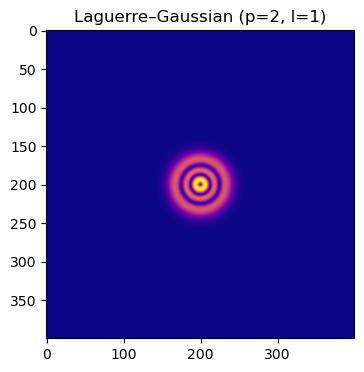

In [3]:
#Laguerre–Gaussian (LG)
E_lg = bs.lg(p=2, l=1)
plt.figure(figsize=(4,4))
plt.imshow(np.abs(E_lg), cmap='plasma')
plt.title("Laguerre–Gaussian (p=2, l=1)")
plt.show()

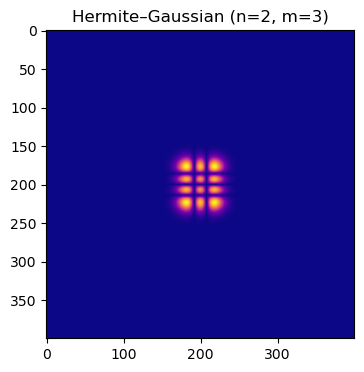

In [4]:
#Hermite–Gaussian (HG)
E_hg = bs.hg(n=2, m=3)
plt.figure(figsize=(4,4))
plt.imshow(np.abs(E_hg), cmap='plasma')
plt.title("Hermite–Gaussian (n=2, m=3)")
plt.show()

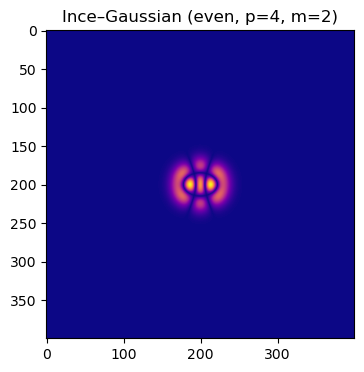

In [5]:
#Ince–Gaussian (IG)
E_ig = bs.ig(p=4, m=2, beam="e", elliptic_param=2)
plt.figure(figsize=(4,4))
plt.imshow(np.abs(E_ig), cmap='plasma')
plt.title("Ince–Gaussian (even, p=4, m=2)")
plt.show()

### Propagation

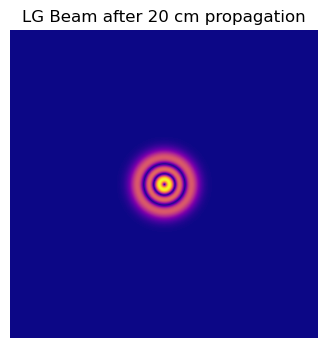

In [6]:
E_prop = bs.propagation(E_lg, z=20e-2)
plt.figure(figsize=(4,4))
plt.imshow(np.abs(E_prop), cmap='plasma')
plt.title("LG Beam after 20 cm propagation")
plt.axis('off')
plt.show()

### Turbulence and Propagation

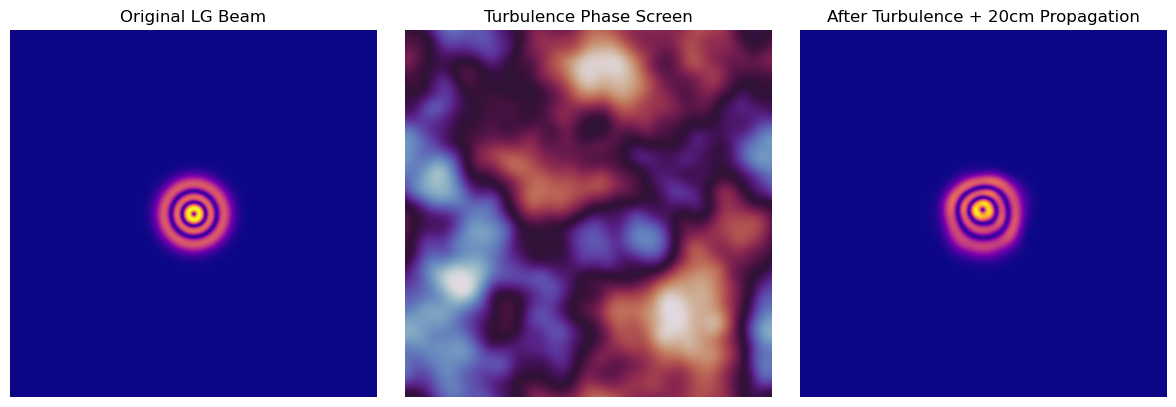

In [9]:
phi_turb = bs.turbulence(Cn2=38e-12, l_max=25, l_min=1e-3)
E_turb = E_lg * np.exp(1j * phi_turb)
E_turb_prop = bs.propagation(E_turb, z=20e-2)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(np.abs(E_lg), cmap='plasma')
plt.title("Original LG Beam")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(phi_turb, cmap='twilight')
plt.title("Turbulence Phase Screen")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(np.abs(E_turb_prop), cmap='plasma')
plt.title("After Turbulence + 20cm Propagation")
plt.axis('off')

plt.tight_layout()
plt.show()